<a href="https://colab.research.google.com/github/girinath18/aadhaar-cardDetection/blob/master/Aadhaar_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
#configurating the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d girinathrs211555/aadhaar-datasets

Dataset URL: https://www.kaggle.com/datasets/girinathrs211555/aadhaar-datasets
License(s): unknown
aadhaar-datasets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# extrcing the compossed Dataset
from zipfile import ZipFile
dataset = '/content/aadhaar-datasets.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
Aadhaar_card_files = os.listdir('/content/AADHAAR_CARD_DETECTION/Aadhaar_card')
print(Aadhaar_card_files[0:5])

print(Aadhaar_card_files[-5:])

['BAT (311).jpeg', 'BAT (3101).jpg', 'BAT (100).jpg', 'BAT (2710).jpg', 'BAT (902).jpg']
['BAT (423).jpg', 'BAT (392).jpeg', 'BAT (856).png', 'BAT (930).png', 'BAT (870).jpg']


In [7]:
Non_aadhaar_card_files = os.listdir('/content/AADHAAR_CARD_DETECTION/Not_Aadhaar_card')
print(Non_aadhaar_card_files[0:5])

print(Non_aadhaar_card_files[-5:])

['A (2552).jpeg', 'A (345).jpg', 'A (1737).jpeg', 'A (870).jpeg', 'A (2895).jpeg']
['A (497).jpg', 'A (2629).jpeg', 'A (826).jpeg', 'A (256).jpg', 'A (3514).jpeg']


In [8]:
print('Number of with Aadhaar_card_files:', len(Aadhaar_card_files))
print('Number of without Non_aadhaar_card_files:', len(Non_aadhaar_card_files))

Number of with Aadhaar_card_files: 5000
Number of without Non_aadhaar_card_files: 5000


In [9]:
#create the labels

Aadhaar_card_labels = [1]*5000

Non_aadhaar_card_labels = [0]*5000

In [10]:
# Checking wheather the labels are created as expected
print(Aadhaar_card_labels[0:5])

print(Non_aadhaar_card_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
# I am Concanating  the  two class as labels

labels = Aadhaar_card_labels + Non_aadhaar_card_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

10000
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
# Convert images to numpy arrays

Aadhaar_card__path = '/content/AADHAAR_CARD_DETECTION/Aadhaar_card/'

data = []
for img_file in Aadhaar_card_files:

  image = Image.open(Aadhaar_card__path + img_file)
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

Non_aadhaar_card_path = '/content/AADHAAR_CARD_DETECTION/Not_Aadhaar_card/'

for img_file in Non_aadhaar_card_files:

  image = Image.open(Non_aadhaar_card_path + img_file)
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

In [13]:
# Coverting image list and the label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [14]:
type(X)

numpy.ndarray

In [15]:
type(Y)

numpy.ndarray

In [16]:
print(X.shape)
print(Y.shape)

(10000, 128, 128, 3)
(10000,)


In [17]:
print(Y)

[1 1 1 ... 0 0 0]


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [19]:
#Scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [20]:
import tensorflow as tf
from tensorflow import keras

In [21]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dropout(0.7))  # Increased dropout rate
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.7))  # Increased dropout rate

model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [23]:
# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=10)


Epoch 1/10
200/200 [==============================] - 16s 40ms/step - loss: 0.1016 - acc: 0.9506 - val_loss: 6.9737e-07 - val_acc: 1.0000
Epoch 2/10
200/200 [==============================] - 7s 36ms/step - loss: 6.3064e-04 - acc: 0.9997 - val_loss: 1.2666e-08 - val_acc: 1.0000
Epoch 3/10
200/200 [==============================] - 7s 35ms/step - loss: 4.9538e-06 - acc: 1.0000 - val_loss: 6.1840e-09 - val_acc: 1.0000
Epoch 4/10
200/200 [==============================] - 7s 36ms/step - loss: 1.8251e-04 - acc: 1.0000 - val_loss: 9.6858e-09 - val_acc: 1.0000
Epoch 5/10
200/200 [==============================] - 7s 36ms/step - loss: 0.0156 - acc: 0.9984 - val_loss: 0.1294 - val_acc: 0.9469
Epoch 6/10
200/200 [==============================] - 7s 34ms/step - loss: 0.0917 - acc: 0.9830 - val_loss: 5.2005e-08 - val_acc: 1.0000
Epoch 7/10
200/200 [==============================] - 7s 36ms/step - loss: 0.0159 - acc: 0.9997 - val_loss: 8.2143e-04 - val_acc: 1.0000
Epoch 8/10
200/200 [============

In [24]:
# Adjust the learning rate
adam_optimizer = keras.optimizers.Adam(learning_rate=0.0001)

In [25]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy=', accuracy)

63/63 [==============================] - 1s 18ms/step - loss: 0.0000e+00 - acc: 1.0000
Test Accuracy= 1.0


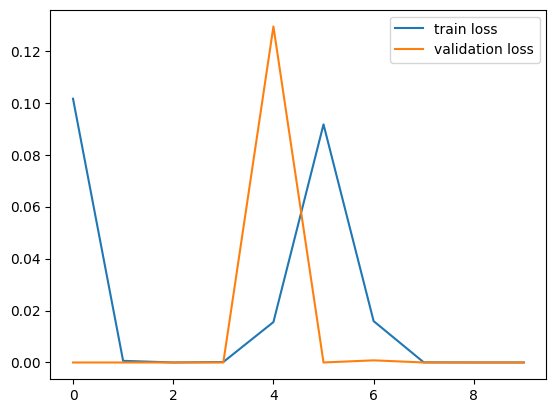

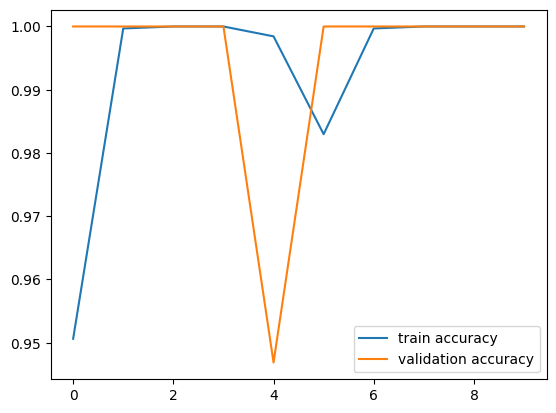

In [26]:
# Plot the training history
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'], label='train accuracy')
plt.plot(history.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128, 128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:

  print('This is an aadhaar card')

else:

  print('This not an aadhaar card')

In [35]:
model.save('Aero.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
